In [3]:
# Load all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ssm

# Set the parameters of the GLM-HMM
obs_dim = 1           # number of observed dimensions (probability of choice)
num_categories = 2    # number of categories for output (L vs R)
input_dim = 3         # input dimensions (covariates)

In [4]:
# Load monkey data
m133_cyl = pd.read_csv("m133_cyl_pp.csv")
m134_cyl = pd.read_csv("m134_cyl_pp.csv")
m133_RDK = pd.read_csv("m133_dots_pp.csv")
m134_RDK = pd.read_csv("m134_dots_pp.csv")

In [5]:
# Normalise using the thresholds obtained from the psychophysics 
m133_cyl['stim'] /= 0.026
m134_cyl['stim'] /= 0.02
m133_RDK['stim'] /= 24.7
m134_RDK['stim'] /= 12.3

In [6]:
m133_cyl["num_of_resps"] = 1.0
m134_RDK["num_of_resps"] = 1.0
m133_RDK["num_of_resps"] = 1.0
m134_cyl["num_of_resps"] = 1.0

m133_cyl["previous_response"] = 2.0
m134_RDK["previous_response"] = 2.0
m133_RDK["previous_response"] = 2.0
m134_cyl["previous_response"] = 2.0

In [7]:
for subject in m133_cyl.subj_idx.unique():
    
    for index, row in m133_cyl.loc[m133_cyl.subj_idx == subject, :].iterrows():

        # Firstly, find the very first index and let the response mode be 0
        if index == m133_cyl.loc[m133_cyl.subj_idx == subject, :].index[0]:
            pass
        else:
            m133_cyl.at[index, "previous_response"] = m133_cyl.iloc[index-1].response
            
m133_cyl = m133_cyl.drop(m133_cyl[m133_cyl['previous_response'] == 2].index)

In [8]:
for subject in m134_cyl.subj_idx.unique():
    
    for index, row in m134_cyl.loc[m134_cyl.subj_idx == subject, :].iterrows():

        # Firstly, find the very first index and let the response mode be 0
        if index == m134_cyl.loc[m134_cyl.subj_idx == subject, :].index[0]:
            pass
        else:
            m134_cyl.at[index, "previous_response"] = m134_cyl.iloc[index-1].response
            
m134_cyl = m134_cyl.drop(m134_cyl[m134_cyl['previous_response'] == 2].index)

In [9]:
for subject in m133_RDK.subj_idx.unique():
    
    for index, row in m133_RDK.loc[m133_RDK.subj_idx == subject, :].iterrows():

        # Firstly, find the very first index and let the response mode be 0
        if index == m133_RDK.loc[m133_RDK.subj_idx == subject, :].index[0]:
            pass
        else:
            m133_RDK.at[index, "previous_response"] = m133_RDK.iloc[index-1].response
            
m133_RDK = m133_RDK.drop(m133_RDK[m133_RDK['previous_response'] == 2].index)

In [10]:
for subject in m134_RDK.subj_idx.unique():
    
    for index, row in m134_RDK.loc[m134_RDK.subj_idx == subject, :].iterrows():

        # Firstly, find the very first index and let the response mode be 0
        if index == m134_RDK.loc[m134_RDK.subj_idx == subject, :].index[0]:
            pass
        else:
            m134_RDK.at[index, "previous_response"] = m134_RDK.iloc[index-1].response
            
m134_RDK = m134_RDK.drop(m134_RDK[m134_RDK['previous_response'] == 2].index)

In [11]:
for subject in m133_cyl.subj_idx.unique():
    m133_cyl = m133_cyl.drop(m133_cyl.loc[m133_cyl.subj_idx == subject].index[0])
    
for subject in m134_cyl.subj_idx.unique():
    m134_cyl = m134_cyl.drop(m134_cyl.loc[m134_cyl.subj_idx == subject].index[0])
    
for subject in m133_RDK.subj_idx.unique():
    m133_RDK = m133_RDK.drop(m133_RDK.loc[m133_RDK.subj_idx == subject].index[0])
    
for subject in m134_RDK.subj_idx.unique():
    m134_RDK = m134_RDK.drop(m134_RDK.loc[m134_RDK.subj_idx == subject].index[0])

In [12]:
m133_cyl.previous_response *= 2
m133_cyl.previous_response += -1 

m134_cyl.previous_response *= 2
m134_cyl.previous_response += -1 

m133_RDK.previous_response *= 2
m133_RDK.previous_response += -1 

m134_RDK.previous_response *= 2
m134_RDK.previous_response += -1 

In [13]:
stim_C_m133 = np.empty((9, 698, 3))
stim_C_m134 = np.empty((10, 1812, 3))
stim_D_m133 = np.empty((11, 130, 3))
stim_D_m134 = np.empty((11, 997, 3))

choices_C_m133 = np.empty((9, 698, 1))
choices_C_m134 = np.empty((10, 1812, 1))
choices_D_m133 = np.empty((11, 130, 1))
choices_D_m134 = np.empty((11, 997, 1))

for count1, session in enumerate(m133_cyl.subj_idx.unique()):

    stim_C_m133[count1, :, :] = m133_cyl.loc[m133_cyl.subj_idx == session, ["stim", "previous_response", "num_of_resps"]][0:698]
    choices_C_m133[count1, :] = np.array(m133_cyl.loc[m133_cyl.subj_idx == session, ["response"]][0:698])

for count2, session in enumerate(m134_cyl.subj_idx.unique()):

    stim_C_m134[count2, :, :] = m134_cyl.loc[m134_cyl.subj_idx == session, ["stim", "previous_response", "num_of_resps"]][0:1812]
    choices_C_m134[count2, :] = np.array(m134_cyl.loc[m134_cyl.subj_idx == session, ["response"]][0:1812])

for count3, session in enumerate(m133_RDK.subj_idx.unique()):

    stim_D_m133[count3, :, :] = m133_RDK.loc[m133_RDK.subj_idx == session, ["stim", "previous_response", "num_of_resps"]][0:130]
    choices_D_m133[count3, :] = np.array(m133_RDK.loc[m133_RDK.subj_idx == session, ["response"]][0:130])
    
for count4, session in enumerate(m134_RDK.subj_idx.unique()):

    stim_D_m134[count4, :, :] = m134_RDK.loc[m134_RDK.subj_idx == session, ["stim", "previous_response", "num_of_resps"]][0:997]
    choices_D_m134[count4, :] = np.array(m134_RDK.loc[m134_RDK.subj_idx == session, ["response"]][0:997])
    
    
# Make sure the choices are integers
choices_C_m133 = choices_C_m133.astype(int)
choices_C_m134 = choices_C_m134.astype(int)
choices_D_m133 = choices_D_m133.astype(int)
choices_D_m134 = choices_D_m134.astype(int)

choices_C_m133 = list(choices_C_m133)
choices_C_m134 = list(choices_C_m134)
choices_D_m133 = list(choices_D_m133)
choices_D_m134 = list(choices_D_m134)

stim_C_m133 = list(stim_C_m133)
stim_C_m134 = list(stim_C_m134)
stim_D_m133 = list(stim_D_m133)
stim_D_m134 = list(stim_D_m134)


In [14]:
inpts_train_list_m133_C = []
test_list_m133_C = []
datas_train_list_m133_C =[]
datas_test_list_m133_C = []

inpts_train_list_m134_C = []
test_list_m134_C = []
datas_train_list_m134_C =[]
datas_test_list_m134_C = []

inpts_train_list_m133_D = []
test_list_m133_D = []
datas_train_list_m133_D =[]
datas_test_list_m133_D = []

inpts_train_list_m134_D = []
test_list_m134_D = []
datas_train_list_m134_D =[]
datas_test_list_m134_D = []

# Set up cross-validation for the monkeys (leave one session out; NB this isn't a true LOO because we keep an
# entire session as a hold-out, not a single trial)
for i in range(len(stim_C_m133)):
    inpts_train_list_m133_C.append(stim_C_m133[:i] + stim_C_m133[i+1:])
    datas_train_list_m133_C.append(choices_C_m133[:i] + choices_C_m133[i+1:])
    
    test_list_m133_C.append(stim_C_m133[i])
    datas_test_list_m133_C.append(choices_C_m133[i])
    
for i in range(len(stim_C_m134)):
    inpts_train_list_m134_C.append(stim_C_m134[:i] + stim_C_m134[i+1:])
    datas_train_list_m134_C.append(choices_C_m134[:i] + choices_C_m134[i+1:])
    
    test_list_m134_C.append(stim_C_m134[i])
    datas_test_list_m134_C.append(choices_C_m134[i])
    
for i in range(len(stim_D_m133)):
    inpts_train_list_m133_D.append(stim_D_m133[:i] + stim_D_m133[i+1:])
    datas_train_list_m133_D.append(choices_D_m133[:i] + choices_D_m133[i+1:])
    
    test_list_m133_D.append(stim_D_m133[i])
    datas_test_list_m133_D.append(choices_D_m133[i])
    
for i in range(len(stim_D_m134)):
    inpts_train_list_m134_D.append(stim_D_m134[:i] + stim_D_m134[i+1:])
    datas_train_list_m134_D.append(choices_D_m134[:i] + choices_D_m134[i+1:])
    
    test_list_m134_D.append(stim_D_m134[i])
    datas_test_list_m134_D.append(choices_D_m134[i])
    

In [ ]:
# Cylinder, m133
fold_length = len(stim_C_m133)
total_test_LL_C_m133 = np.empty((fold_length, 5))
init_array = np.empty(((3, 1, 3)))

# Create a new array with 0s 
zeros_array = np.array([[[0, 0, 0]]])

for model_type in range(5):
    for fold in range(len(stim_C_m133)):
        inpts = inpts_train_list_m133_C[fold]
        datas = datas_train_list_m133_C[fold]

        glmhmm_C_m133_LL = ssm.HMM(model_type+1, obs_dim, input_dim, observations="input_driven_obs", 
                       observation_kwargs=dict(C=num_categories), transitions="standard")
        
        # Make sure we initialise from the previous iteration 
        if model_type == 0:
            pass
        else:
            glmhmm_C_m133_LL.observations.params = init_array
            glmhmm_C_m133_LL.observations.params = np.vstack((glmhmm_C_m133_LL.observations.params, zeros_array))

        glmhmm_C_m133_LL.fit(datas, inputs=inpts, method="em", num_iters=300, tolerance=10**-4)

        total_test_LL_C_m133[fold, model_type] = glmhmm_C_m133_LL.log_likelihood(datas_test_list_m133_C[fold], inputs=test_list_m133_C[fold])

    init_array = glmhmm_C_m133_LL.observations.params


In [255]:
# Cylinder, m134
fold_length = len(stim_C_m134)
total_test_LL_C_m134 = np.empty((fold_length, 5))
init_array = np.empty(((3, 1, 3)))

# Create a new array with 0s 
zeros_array = np.array([[[0, 0, 0]]])

for model_type in range(5):
    for fold in range(len(stim_C_m134)):
        inpts = inpts_train_list_m134_C[fold]
        datas = datas_train_list_m134_C[fold]

        glmhmm_C_m134_LL = ssm.HMM(model_type+1, obs_dim, input_dim, observations="input_driven_obs", 
                       observation_kwargs=dict(C=num_categories), transitions="standard")
        
        # Make sure we initialise from the previous iteration 
        if model_type == 0:
            pass
        else:
            glmhmm_C_m134_LL.observations.params = init_array
            glmhmm_C_m134_LL.observations.params = np.vstack((glmhmm_C_m134_LL.observations.params, zeros_array))

        glmhmm_C_m134_LL.fit(datas, inputs=inpts, method="em", num_iters=300, tolerance=10**-4)

        total_test_LL_C_m134[fold, model_type] = glmhmm_C_m134_LL.log_likelihood(datas_test_list_m134_C[fold], inputs=test_list_m134_C[fold])

    init_array = glmhmm_C_m134_LL.observations.params


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [260]:
# RDK, m133
fold_length = len(stim_D_m133)
total_test_LL_D_m133 = np.empty((fold_length, 5))
init_array = np.empty(((3, 1, 3)))

# Create a new array with 0s 
zeros_array = np.array([[[0, 0, 0]]])

for model_type in range(5):
    for fold in range(len(stim_D_m133)):
        inpts = inpts_train_list_m133_D[fold]
        datas = datas_train_list_m133_D[fold]

        glmhmm_D_m133_LL = ssm.HMM(model_type+1, obs_dim, input_dim, observations="input_driven_obs", 
                       observation_kwargs=dict(C=num_categories), transitions="standard")
        
        # Make sure we initialise from the previous iteration 
        if model_type == 0:
            pass
        else:
            glmhmm_D_m133_LL.observations.params = init_array
            glmhmm_D_m133_LL.observations.params = np.vstack((glmhmm_D_m133_LL.observations.params, zeros_array))

        glmhmm_D_m133_LL.fit(datas, inputs=inpts, method="em", num_iters=300, tolerance=10**-4)

        total_test_LL_D_m133[fold, model_type] = glmhmm_D_m133_LL.log_likelihood(datas_test_list_m133_D[fold], inputs=test_list_m133_D[fold])

    init_array = glmhmm_D_m133_LL.observations.params


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [256]:
# RDK, m134
fold_length = len(stim_D_m134)
total_test_LL_D_m134 = np.empty((fold_length, 5))
init_array = np.empty(((3, 1, 3)))

# Create a new array with 0s 
zeros_array = np.array([[[0, 0, 0]]])

for model_type in range(5):
    for fold in range(len(stim_D_m134)):
        inpts = inpts_train_list_m134_D[fold]
        datas = datas_train_list_m134_D[fold]

        glmhmm_D_m134_LL = ssm.HMM(model_type+1, obs_dim, input_dim, observations="input_driven_obs", 
                       observation_kwargs=dict(C=num_categories), transitions="standard")
        
        # Make sure we initialise from the previous iteration 
        if model_type == 0:
            pass
        else:
            glmhmm_D_m134_LL.observations.params = init_array
            glmhmm_D_m134_LL.observations.params = np.vstack((glmhmm_D_m134_LL.observations.params, zeros_array))

        glmhmm_D_m134_LL.fit(datas, inputs=inpts, method="em", num_iters=300, tolerance=10**-4)

        total_test_LL_D_m134[fold, model_type] = glmhmm_D_m134_LL.log_likelihood(datas_test_list_m134_D[fold], inputs=test_list_m134_D[fold])

    init_array = glmhmm_D_m134_LL.observations.params


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

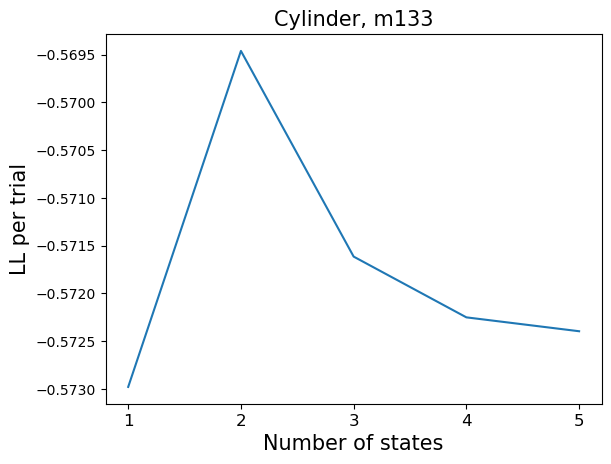

In [253]:
# Plot the LL per trial
LL_per_trial_C_m133 = total_test_LL_C_m133.mean(axis=0)/(len(stim_C_m133[0]))
plt.plot(range(1, 6), LL_per_trial_C_m133)
plt.xticks([1, 2, 3, 4, 5], fontsize=12)
plt.ylabel("LL per trial", fontsize=15)
plt.xlabel("Number of states", fontsize=15)
plt.title("Cylinder, m133", fontsize=15)
plt.savefig("m133_cyl_GLM_LL.svg", bbox_inches='tight')

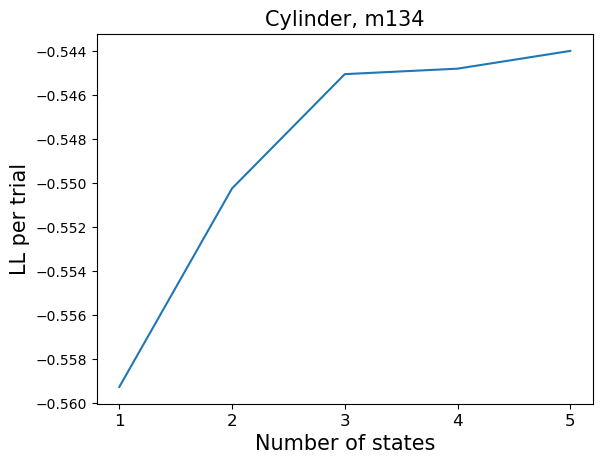

In [261]:
# Plot the LL per trial
LL_per_trial_C_m134 = total_test_LL_C_m134.mean(axis=0)/(len(stim_C_m134[0]))
plt.plot(range(1, 6), LL_per_trial_C_m134)
plt.xticks([1, 2, 3, 4, 5], fontsize=12)
plt.ylabel("LL per trial", fontsize=15)
plt.xlabel("Number of states", fontsize=15)
plt.title("Cylinder, m134", fontsize=15)
plt.savefig("m134_cyl_GLM_LL.svg", bbox_inches='tight')

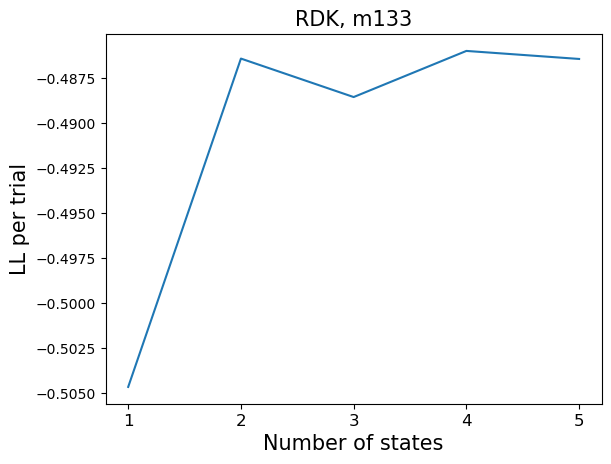

In [266]:
# Plot the LL per trial
LL_per_trial_D_m133 = total_test_LL_D_m133.mean(axis=0)/(len(stim_D_m133[0]))
plt.plot(range(1, 6), LL_per_trial_D_m133)
plt.xticks([1, 2, 3, 4, 5], fontsize=12)
plt.ylabel("LL per trial", fontsize=15)
plt.xlabel("Number of states", fontsize=15)
plt.title("RDK, m133", fontsize=15)
plt.savefig("m133_RDK_GLM_LL.svg", bbox_inches='tight')

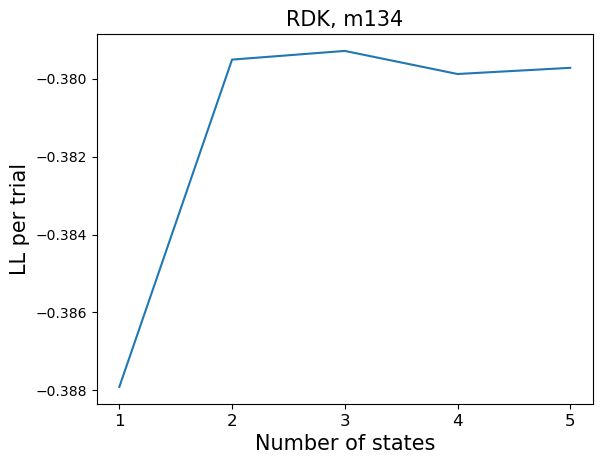

In [268]:
# Plot the LL per trial
LL_per_trial_D_m134 = total_test_LL_D_m134.mean(axis=0)/(len(stim_D_m134[0]))
plt.plot(range(1, 6), LL_per_trial_D_m134)
plt.xticks([1, 2, 3, 4, 5], fontsize=12)
plt.ylabel("LL per trial", fontsize=15)
plt.xlabel("Number of states", fontsize=15)
plt.title("RDK, m134", fontsize=15)
plt.savefig("m134_RDK_GLM_LL.svg", bbox_inches='tight')

  0%|          | 0/200 [00:00<?, ?it/s]

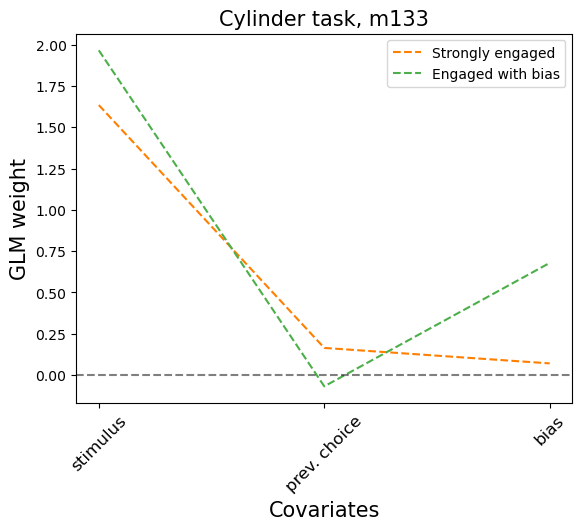

In [27]:
# Plot the cylinder
glmhmm_C_3_m133 = ssm.HMM(2, obs_dim, input_dim, observations="input_driven_obs", 
               observation_kwargs=dict(C=num_categories), transitions="standard")

glmhmm_C_3_m133.fit(choices_C_m133, inputs=stim_C_m133, method="em", num_iters=200, tolerance=10**-4)

cols = ['#ff7f00', '#4daf4a']

for k in range(2):
    plt.plot(range(input_dim), -glmhmm_C_3_m133.observations.params[k][0], 
             lw=1.5,  linestyle = '--', color=cols[k])
        
plt.yticks(fontsize=10)
plt.ylabel("GLM weight", fontsize=15)
plt.xlabel("Covariates", fontsize=15)
plt.xticks([0, 1, 2], ['stimulus', "prev. choice", 'bias'], fontsize=12, rotation=45)
plt.axhline(y=0, color="k", alpha=0.5, ls="--")
plt.legend(["Strongly engaged", "Engaged with bias"])
plt.title("Cylinder task, m133", fontsize=15)
plt.savefig("m133_cylinder_GLM.svg", bbox_inches='tight')

  0%|          | 0/300 [00:00<?, ?it/s]

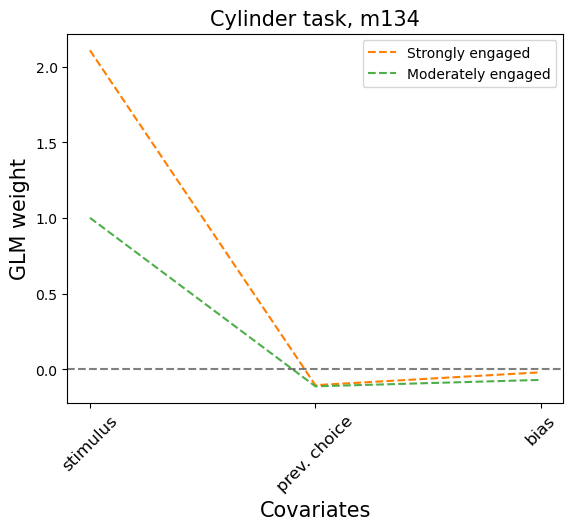

In [58]:
glmhmm_C_3_m134 = ssm.HMM(2, obs_dim, input_dim, observations="input_driven_obs", 
               observation_kwargs=dict(C=num_categories), transitions="standard")

glmhmm_C_3_m134.fit(choices_C_m134, inputs=stim_C_m134, method="em", num_iters=300, tolerance=10**-4)

cols = ['#ff7f00', '#4daf4a']

for k in range(2):
    plt.plot(range(input_dim), -glmhmm_C_3_m134.observations.params[k][0], 
             lw=1.5,  linestyle = '--', color=cols[k])
        
plt.yticks(fontsize=10)
plt.ylabel("GLM weight", fontsize=15)
plt.xlabel("Covariates", fontsize=15)
plt.xticks([0, 1, 2], ['stimulus', "prev. choice", 'bias'], fontsize=12, rotation=45)
plt.axhline(y=0, color="k", alpha=0.5, ls="--")
plt.legend(["Strongly engaged", "Moderately engaged"])
plt.title("Cylinder task, m134", fontsize=15)
plt.savefig("m134_cylinder_GLM.svg", bbox_inches='tight')

  0%|          | 0/200 [00:00<?, ?it/s]

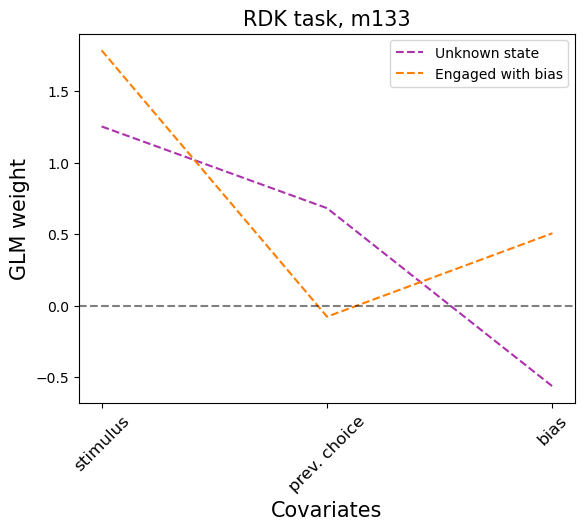

In [21]:
glmhmm_D_3_m133 = ssm.HMM(2, obs_dim, input_dim, observations="input_driven_obs", 
               observation_kwargs=dict(C=num_categories), transitions="standard")

glmhmm_D_3_m133.fit(choices_D_m133, inputs=stim_D_m133, method="em", num_iters=200, tolerance=10**-4)

cols = ['#ad31ad', '#ff7f00']

for k in range(2):
    plt.plot(range(input_dim), -glmhmm_D_3_m133.observations.params[k][0], 
             lw=1.5,  linestyle = '--', color=cols[k])
        
plt.yticks(fontsize=10)
plt.ylabel("GLM weight", fontsize=15)
plt.xlabel("Covariates", fontsize=15)
plt.xticks([0, 1, 2], ['stimulus', "prev. choice", 'bias'], fontsize=12, rotation=45)
plt.axhline(y=0, color="k", alpha=0.5, ls="--")
plt.legend(["Unknown state", "Engaged with bias"])
plt.title("RDK task, m133", fontsize=15)
plt.savefig("m133_RDK_GLM.svg", bbox_inches='tight')

  0%|          | 0/200 [00:00<?, ?it/s]

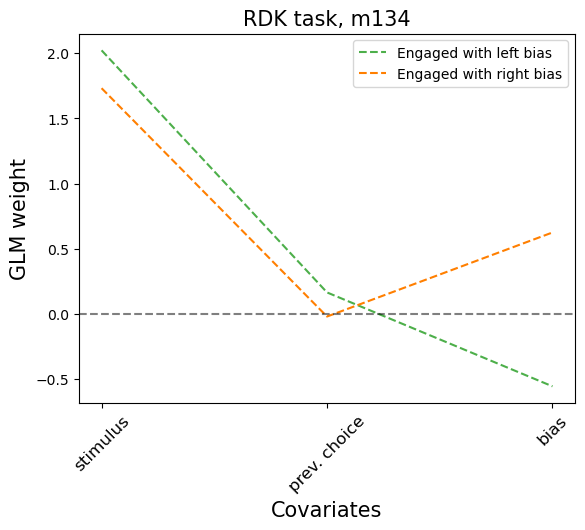

In [35]:
glmhmm_D_3_m134 = ssm.HMM(2, obs_dim, input_dim, observations="input_driven_obs", 
               observation_kwargs=dict(C=num_categories), transitions="standard")

glmhmm_D_3_m134.fit(choices_D_m134, inputs=stim_D_m134, method="em", num_iters=200, tolerance=10**-4)
cols = ['#4daf4a','#ff7f00']
for k in range(2):
    plt.plot(range(input_dim), -glmhmm_D_3_m134.observations.params[k][0],
             lw=1.5,  linestyle = '--', color=cols[k])
        
plt.yticks(fontsize=10)
plt.ylabel("GLM weight", fontsize=15)
plt.xlabel("Covariates", fontsize=15)
plt.xticks([0, 1, 2], ['stimulus', "prev. choice", 'bias'], fontsize=12, rotation=45)
plt.axhline(y=0, color="k", alpha=0.5, ls="--")
plt.legend(["Engaged with left bias", "Engaged with right bias"])
plt.title("RDK task, m134", fontsize=15)
plt.savefig("m134_RDK_GLM.svg", bbox_inches='tight')

In [59]:
# Get the posterior probs for 3 states:
posterior_probs_cyl_m133 = [glmhmm_C_3_m133.expected_states(data=data, input=inpt)
                for data, inpt
                in zip(choices_C_m133, stim_C_m133)]

posterior_probs_cyl_m134 = [glmhmm_C_3_m134.expected_states(data=data, input=inpt)
                for data, inpt
                in zip(choices_C_m134, stim_C_m134)]

posterior_probs_RDK_m133 = [glmhmm_D_3_m133.expected_states(data=data, input=inpt)
                for data, inpt
                in zip(choices_D_m133, stim_D_m133)]

posterior_probs_RDK_m134 = [glmhmm_D_3_m134.expected_states(data=data, input=inpt)
                for data, inpt
                in zip(choices_D_m134, stim_D_m134)]

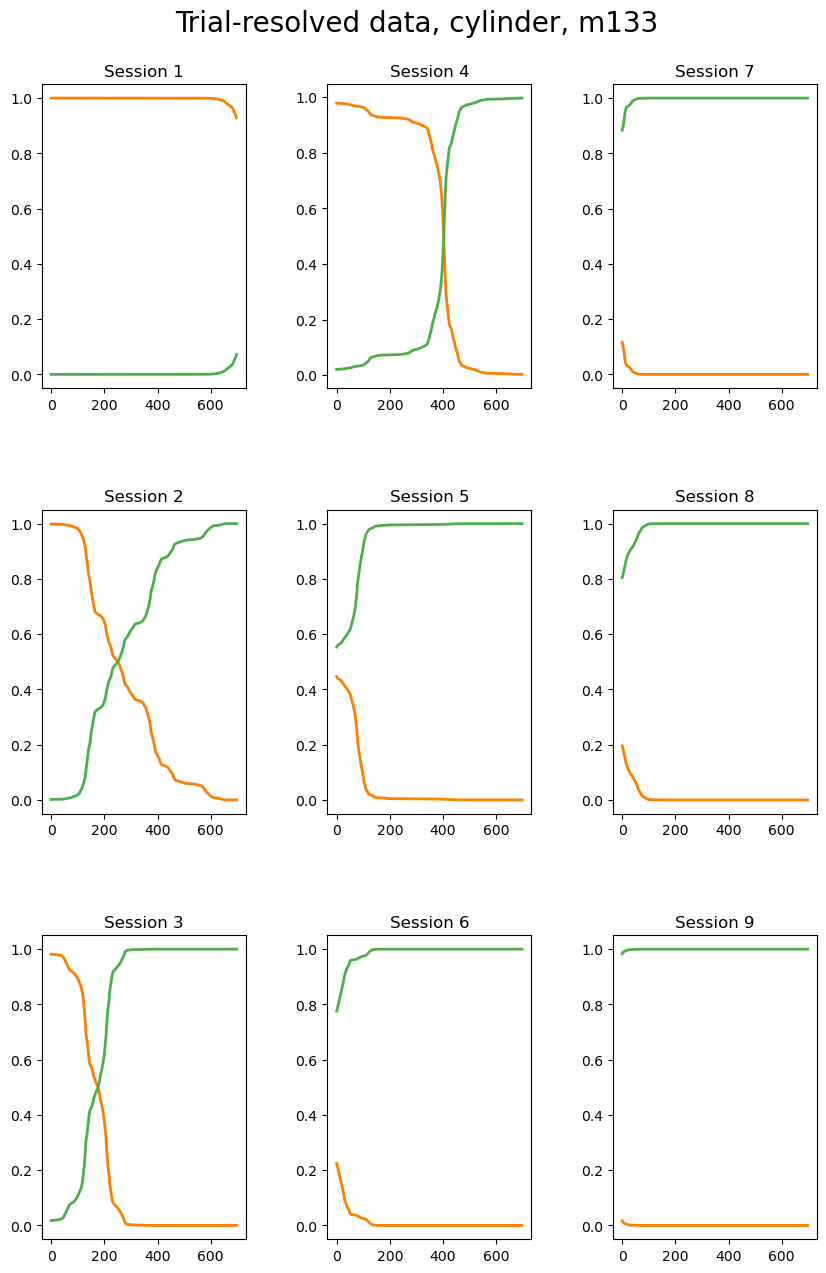

In [28]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ijk = 0
klm = 0
part_id = 1
cols = ['#ff7f00', '#4daf4a']
for participant in posterior_probs_cyl_m133:
    for count, k in enumerate([0, 1]):
        axes[ijk, klm].plot(participant[0][:, k], label="State " + str(k + 1), lw=2, color=cols[count])
    axes[ijk, klm].set_title(f"Session {part_id}")
#     axes[ijk, klm].axvline(x=list_trials_btts_C[part_id-1], color='black', linestyle='-.', alpha=0.9, linewidth=1.3)
    part_id += 1
    ijk += 1
    
    if ijk == 3:
        ijk = 0
        klm += 1
        
fig.suptitle('Trial-resolved data, cylinder, m133', fontsize=20, y=0.93)
fig.savefig("cyl_m133_GLM_resolved_data.svg")

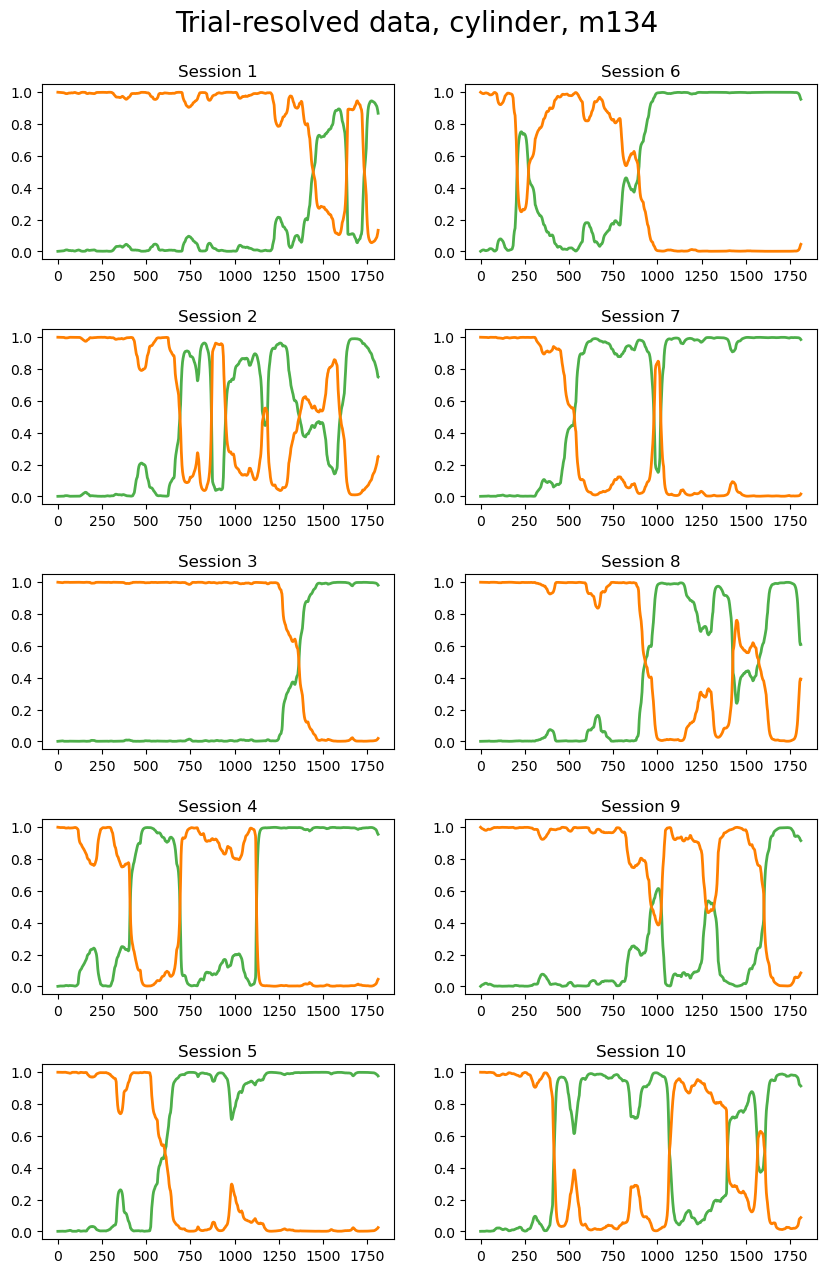

In [61]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

ijk = 0
klm = 0
part_id = 1
cols = ['#4daf4a','#ff7f00']
for participant in posterior_probs_cyl_m134:
    for count, k in enumerate([0, 1]):
        axes[ijk, klm].plot(participant[0][:, k], label="State " + str(k + 1), lw=2, color=cols[count])
    axes[ijk, klm].set_title(f"Session {part_id}")
#     axes[ijk, klm].axvline(x=list_trials_btts_C[part_id-1], color='black', linestyle='-.', alpha=0.9, linewidth=1.3)
    part_id += 1
    ijk += 1
    
    if ijk == 5:
        ijk = 0
        klm += 1
        
fig.suptitle('Trial-resolved data, cylinder, m134', fontsize=20, y=0.93)
fig.savefig("cyl_m134_GLM_resolved_data.svg")

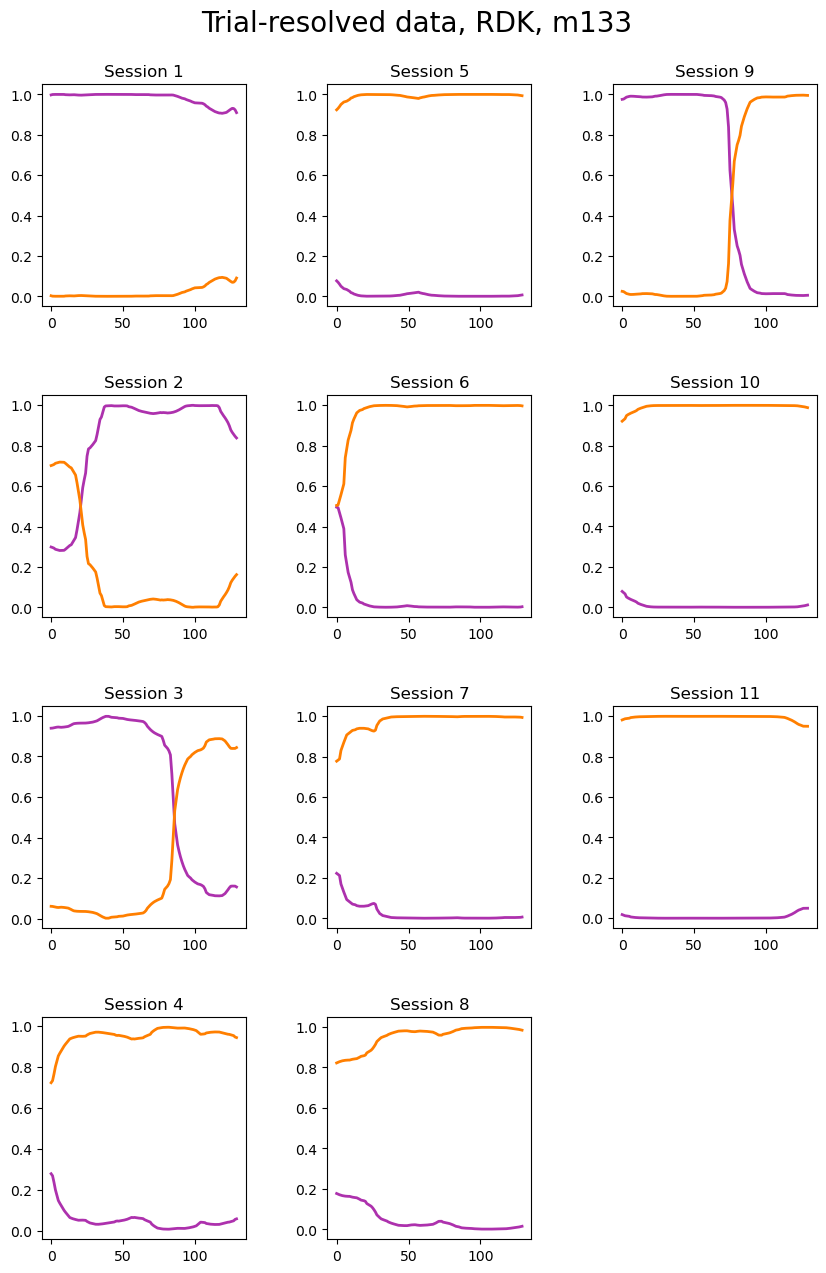

In [62]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ijk = 0
klm = 0
part_id = 1
cols = ['#ad31ad', '#ff7f00']
for participant in posterior_probs_RDK_m133:
    for count, k in enumerate([0, 1]):
        axes[ijk, klm].plot(participant[0][:, k], label="State " + str(k + 1), lw=2, color=cols[count])
    axes[ijk, klm].set_title(f"Session {part_id}")
#     axes[ijk, klm].axvline(x=list_trials_btts_C[part_id-1], color='black', linestyle='-.', alpha=0.9, linewidth=1.3)
    part_id += 1
    ijk += 1
    
    if ijk == 4:
        ijk = 0
        klm += 1
        
fig.delaxes(axes[3, 2])

fig.suptitle('Trial-resolved data, RDK, m133', fontsize=20, y=0.93)
fig.savefig("RDK_m133_GLM_resolved_data.svg")

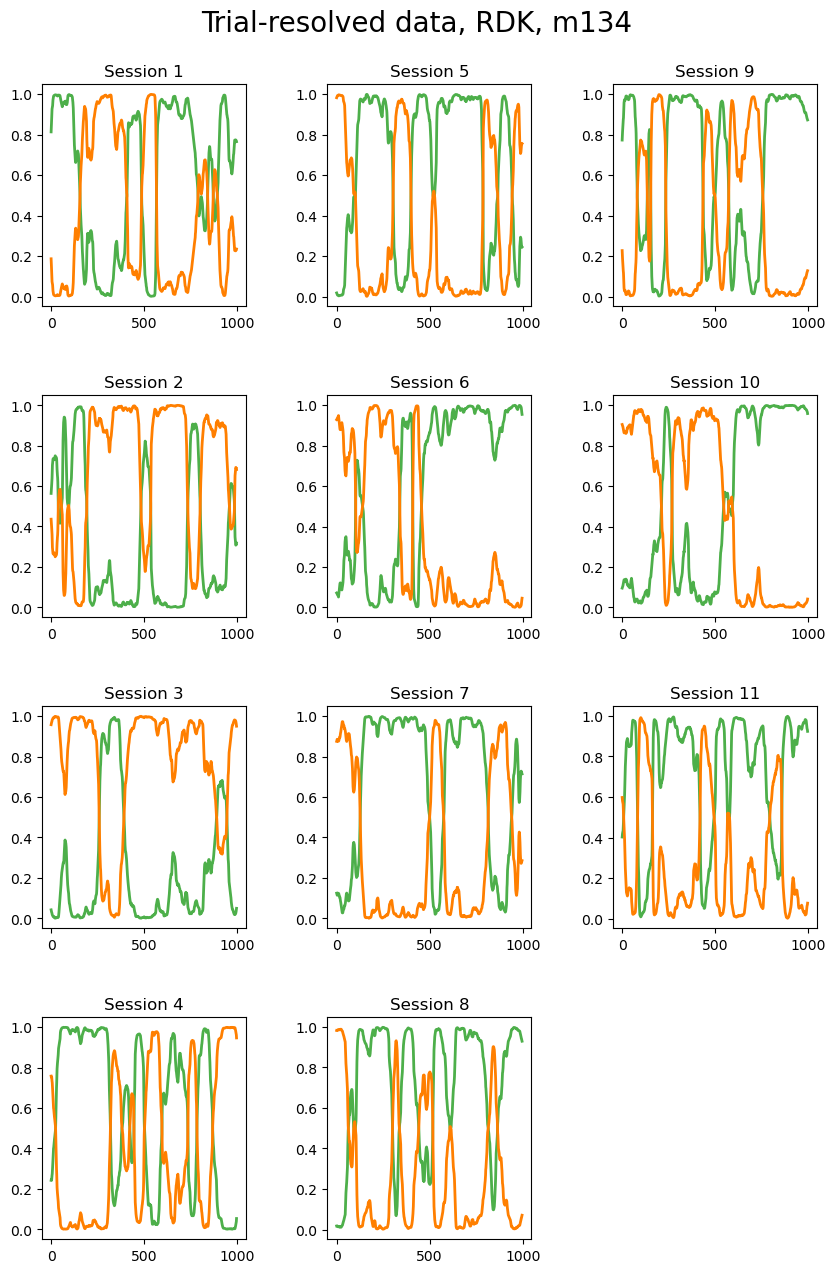

In [63]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ijk = 0
klm = 0
part_id = 1
cols = ['#4daf4a','#ff7f00']
for participant in posterior_probs_RDK_m134:
    for count, k in enumerate([0, 1]):
        axes[ijk, klm].plot(participant[0][:, k], label="State " + str(k + 1), lw=2,color=cols[count])
    axes[ijk, klm].set_title(f"Session {part_id}")
#     axes[ijk, klm].axvline(x=list_trials_btts_C[part_id-1], color='black', linestyle='-.', alpha=0.9, linewidth=1.3)
    part_id += 1
    ijk += 1
    
    if ijk == 4:
        ijk = 0
        klm += 1
        
fig.delaxes(axes[3, 2])

fig.suptitle('Trial-resolved data, RDK, m134', fontsize=20, y=0.93)
fig.savefig("RDK_m134_GLM_resolved_data.svg")

In [369]:
for row in range(len(posterior_probs_cyl_m133)):
    if row == 0:
        arr = posterior_probs_cyl_m133[row][0]
    else:
        posterior_probs_concat_cyl_m133 = np.vstack((arr, posterior_probs_cyl_m133[row][0]))
        
state_max_posterior_cyl_m133 = np.argmax(posterior_probs_concat_cyl_m133, axis = 1)
# now obtain state fractional occupancies:
_, state_occupancies_cyl_m133 = np.unique(state_max_posterior_cyl_m133, return_counts=True)
state_occupancies_cyl_m133 = state_occupancies_cyl_m133/np.sum(state_occupancies_cyl_m133)

In [391]:
for row in range(len(posterior_probs_cyl_m134)):
    if row == 0:
        arr = posterior_probs_cyl_m134[row][0]
    else:
        posterior_probs_concat_cyl_m134 = np.vstack((arr, posterior_probs_cyl_m134[row][0]))
        
state_max_posterior_cyl_m134 = np.argmax(posterior_probs_concat_cyl_m134, axis = 1)
# now obtain state fractional occupancies:
_, state_occupancies_cyl_m134 = np.unique(state_max_posterior_cyl_m134, return_counts=True)
state_occupancies_cyl_m134 = state_occupancies_cyl_m134/np.sum(state_occupancies_cyl_m134)

In [352]:
for row in range(len(posterior_probs_RDK_m133)):
    if row == 0:
        arr = posterior_probs_RDK_m133[row][0]
    else:
        posterior_probs_concat_RDK_m133 = np.vstack((arr, posterior_probs_RDK_m133[row][0]))
        
state_max_posterior_RDK_m133 = np.argmax(posterior_probs_concat_RDK_m133, axis = 1)
# now obtain state fractional occupancies:
_, state_occupancies_RDK_m133 = np.unique(state_max_posterior_RDK_m133, return_counts=True)
state_occupancies_RDK_m133 = state_occupancies_RDK_m133/np.sum(state_occupancies_RDK_m133)

In [353]:
for row in range(len(posterior_probs_RDK_m134)):
    if row == 0:
        arr = posterior_probs_RDK_m134[row][0]
    else:
        posterior_probs_concat_RDK_m134 = np.vstack((arr, posterior_probs_RDK_m134[row][0]))
        
state_max_posterior_RDK_m134 = np.argmax(posterior_probs_concat_RDK_m134, axis = 1)
# now obtain state fractional occupancies:
_, state_occupancies_RDK_m134 = np.unique(state_max_posterior_RDK_m134, return_counts=True)
state_occupancies_RDK_m134 = state_occupancies_RDK_m134/np.sum(state_occupancies_RDK_m134)


Below is some optional code to get the fractional occupanices, note the colour mismatch

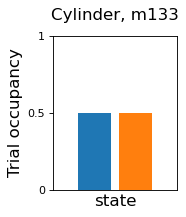

In [401]:
fig = plt.figure(figsize=(2, 2.5), dpi=80, facecolor='w', edgecolor='k')

for z, occ in enumerate(state_occupancies_cyl_m133):
    
    plt.bar(z, occ, width = 0.8)
    
plt.ylim((0, 1))
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=10)
# plt.legend(["Strongly engaged", "Moderately engaged with bias",  "Disengaged"], bbox_to_anchor=(1, 1))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('state', fontsize = 15)
plt.ylabel('Trial occupancy', fontsize=15)
plt.title("Cylinder, m133", y=1.06, fontsize=15)
plt.xlim(-1, 2)
plt.savefig("Trial_occ_cyl_m133.svg", bbox_inches='tight')

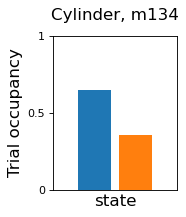

In [400]:
fig = plt.figure(figsize=(2, 2.5), dpi=80, facecolor='w', edgecolor='k')

for z, occ in enumerate(state_occupancies_cyl_m134):
    
    plt.bar(z, occ, width = 0.8)
    
plt.ylim((0, 1))
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=10)
# plt.legend(["Strongly engaged", "Moderately engaged with bias",  "Disengaged"], bbox_to_anchor=(1, 1))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('state', fontsize = 15)
plt.ylabel('Trial occupancy', fontsize=15)
plt.title("Cylinder, m134", y=1.06, fontsize=15)
plt.xlim(-1, 2)
plt.savefig("Trial_occ_cyl_m134.svg", bbox_inches='tight')

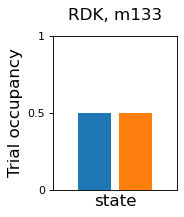

In [399]:
fig = plt.figure(figsize=(2, 2.5), dpi=80, facecolor='w', edgecolor='k')

for z, occ in enumerate(state_occupancies_RDK_m133):
    
    plt.bar(z, occ, width = 0.8)
    
plt.ylim((0, 1))
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=10)
# plt.legend(["Strongly engaged", "Moderately engaged with bias",  "Disengaged"], bbox_to_anchor=(1, 1))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('state', fontsize = 15)
plt.ylabel('Trial occupancy', fontsize=15)
plt.title("RDK, m133", y=1.06, fontsize=15)
plt.xlim(-1, 2)
plt.savefig("Trial_occ_RDK_m133.svg", bbox_inches='tight')

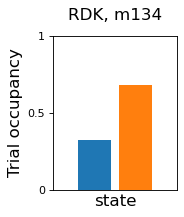

In [398]:
fig = plt.figure(figsize=(2, 2.5), dpi=80, facecolor='w', edgecolor='k')

for z, occ in enumerate(state_occupancies_RDK_m134):
    
    plt.bar(z, occ, width = 0.8)
    
plt.ylim((0, 1))
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=10)
# plt.legend(["Strongly engaged", "Moderately engaged with bias",  "Disengaged"], bbox_to_anchor=(1, 1))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('state', fontsize = 15)
plt.ylabel('Trial occupancy', fontsize=15)
plt.title("RDK, m134", y=1.06, fontsize=15)
plt.xlim(-1, 2)
plt.savefig("Trial_occ_RDK_m134.svg", bbox_inches='tight')